<a href="https://colab.research.google.com/github/wanx-wan/Medical-Cost-Personal-Datasets-In-Python-with-Dash/blob/main/Medical%20Cost%20Personal%20Datasets%20In%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 63114540151 นายพงศกร คำมุงคุล (dash framework & deploy)
2. 63114540210 นายวันเจริญ อุปมัย (Regression & dash framework)
3. 63114540283 นางสาวสุนิตา บุญจริง (Plot graph & deploy)
4. 63114540554 นายฉัตรชัย แก้วฉุย (data preparation)

# Medical Cost Personal Datasets
### Introduction and Objective

> to accurately predict medical costs based on data age, sex (male and female), bmi, children (number of children), smoker (yes or not), region (in the US, northeast, southeast, southwest, northwest). We'll also look into key factors in the data which factors affect healthcare rates the most. and the least To help people care and watch and their own health. to reduce the burden of each medical expense


### Datasets

> Medical Cost Personal Datasets together with Kaggle

> age: age of primary beneficiary

> sex: insurance contractor gender, female, male

> bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

> children: Number of children covered by health insurance / Number of dependents

> smoker: Smoking

> region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

> charges: Individual medical costs billed by health insurance



[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

[Medical Cost Personal Datasets Google drive](https://drive.google.com/drive/folders/15qF1rYOHTufJtAIFlSUoaSrvQGlWzGEl?usp=sharing)

###load data

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
#from google.colab import files
#uploaded = files.upload()

###data preparation

In [ ]:
df = pd.read_csv('/content/insurance.csv')
len(df) 

1338

In [ ]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.sample(5) 

,age,sex,bmi,children,smoker,region,charges
371,57,female,22.230,0,no,northeast,12029.28670
228,41,female,31.635,1,no,northeast,7358.17565
1039,19,male,27.265,2,no,northwest,22493.65964
1288,20,male,39.400,2,yes,southwest,38344.56600
262,52,male,24.320,3,yes,northeast,24869.83680


In [ ]:
df.shape 

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
def convert_sex(x):
  if x == 'male':
    return "0"
  elif x == 'female':
    return "1"

In [ ]:
df['sex'] = df['sex'].apply(convert_sex) 
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [ ]:
def convert_smoker(x): 
  if x == 'no':
    return "0"
  elif x == 'yes':
    return "1"

In [ ]:
df['smoker'] = df['smoker'].apply(convert_smoker) 
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [ ]:
def convert_region(x):
  if x == 'northeast': 
    return "0"
  elif x == 'southeast':
    return "1"
  elif x == 'southwest': 
    return "2"
  elif x == 'northwest': 
    return "3"

In [ ]:
df['region'] = df['region'].apply(convert_region)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [ ]:
df['region'] = df['region'].astype(int) 
df['smoker'] = df['smoker'].astype(int)
df['sex'] = df['sex'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe() 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.486547,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


###Plot graph

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)

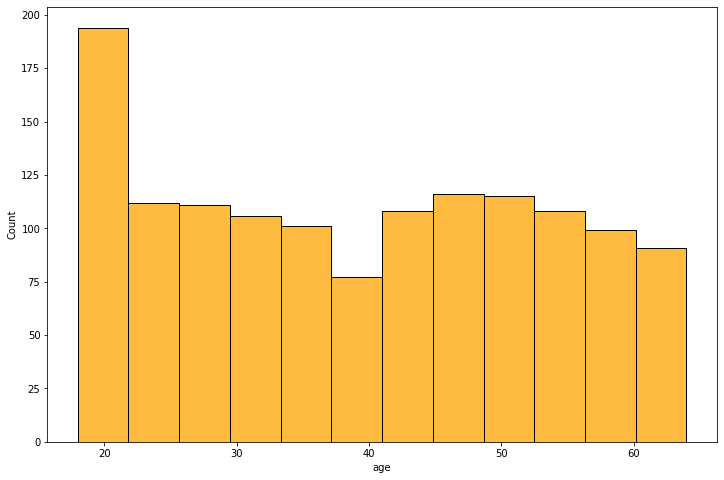

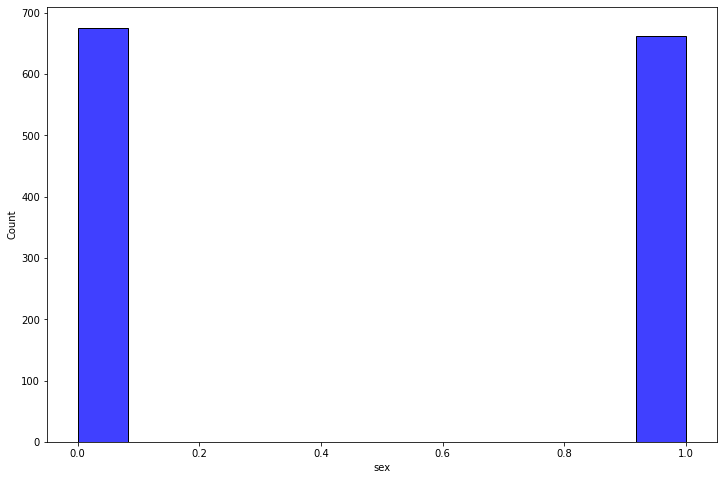

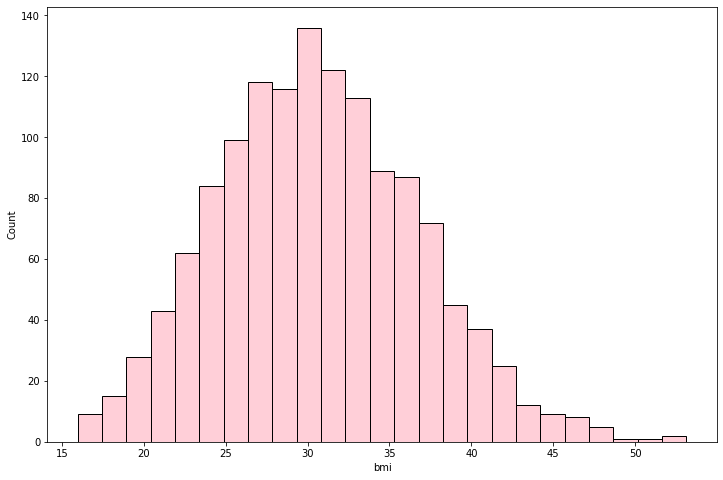

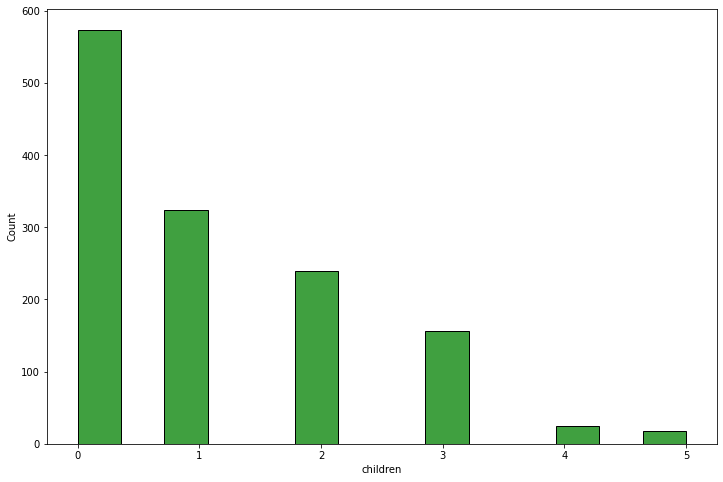

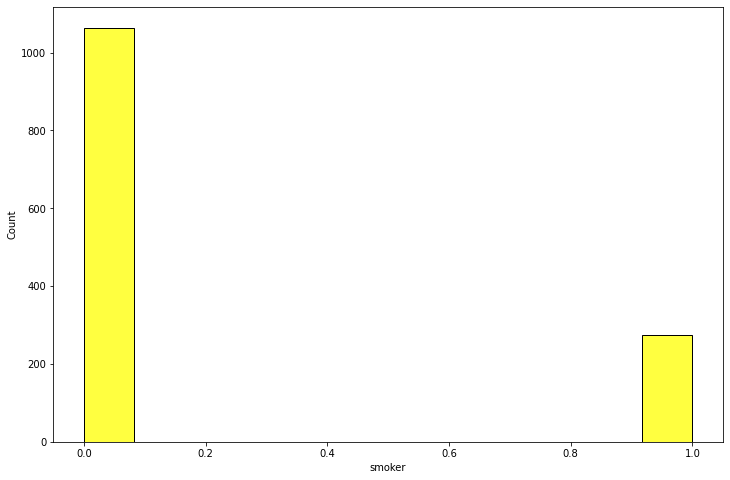

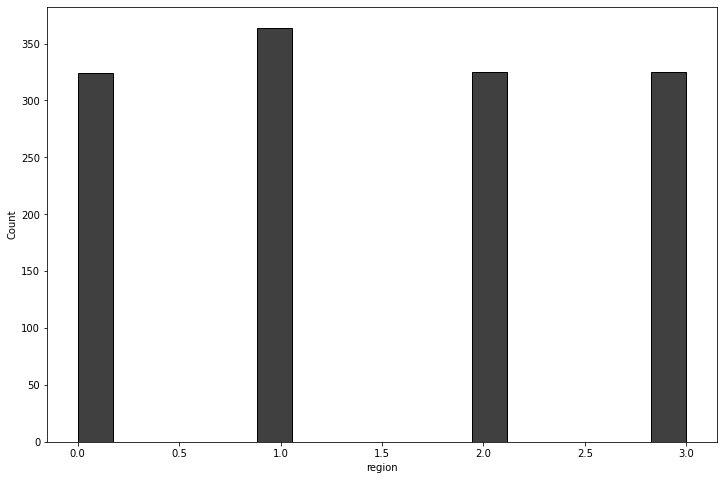

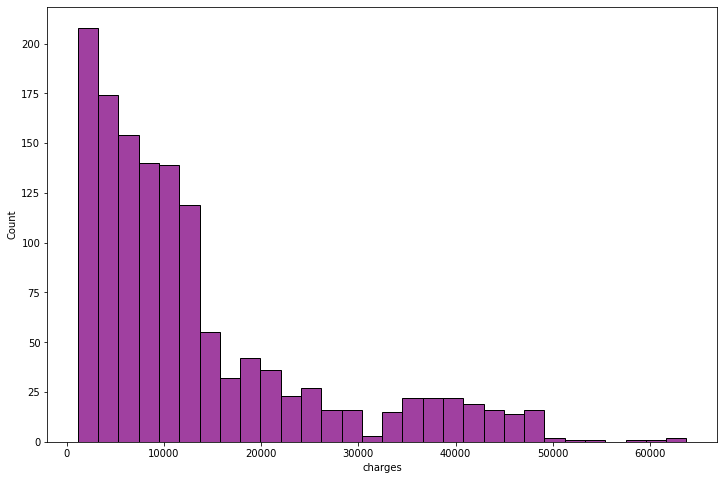

In [ ]:
sns.histplot(df['age'], color="orange") 
plt.show()

sns.histplot(df['sex'], color="blue")
plt.show()

sns.histplot(df['bmi'], color="pink")
plt.show()

sns.histplot(df['children'], color="green")
plt.show()

sns.histplot(df['smoker'], color="yellow")
plt.show()

sns.histplot(df['region'], color="black")
plt.show()

sns.histplot(df['charges'], color="purple")
plt.show()

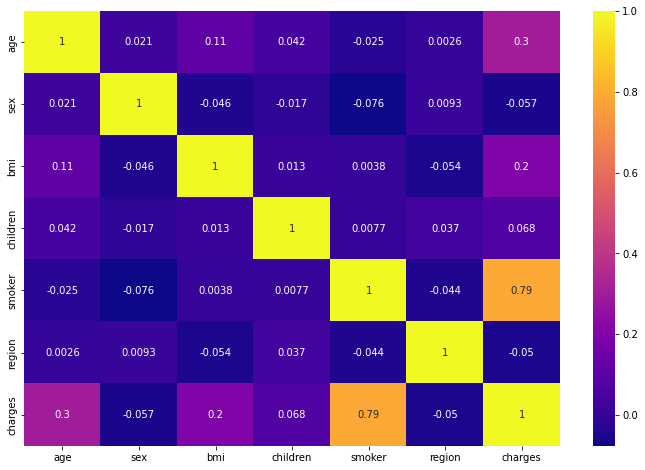

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'plasma', annot= True) 

In [ ]:
px.scatter(data_frame = df, x = 'bmi', y = 'charges', color = 'smoker', template = 'ggplot2')

###Train_Test_Split

In [ ]:
X = df.drop(['charges'], axis = 1) 
y = df.charges 

In [ ]:
print('size of x = {0}'.format(X.size)) 
print('size of y = {0}'.format(y.size)) 

size of x = 8028
size of y = 1338


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34) #

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 936
X_test 402
y_train 936
y_test 402


###Linear Regression.

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercept = '+str(Lin_reg.intercept_))

Intercept = -12649.541265999793


In [ ]:
print('Coefficient = '+str(Lin_reg.coef_))

Coefficient = [  256.72602697   524.80880775   327.76759621   423.50155053
 24124.15634585    86.03505797]


In [ ]:
accuracy = Lin_reg.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.7418266437730066


In [ ]:
y_pred = Lin_reg.predict(X_test)
print(y_pred)

[ 6756.4022652   8490.45309978  7550.97203359  4660.60700569
  6715.23619339  9310.30949483  4976.27045551 10092.2529856
 36539.64143599  8076.24528337  5043.43753182  1744.29875443
  9101.20747255  8062.34784504 39235.75478825 12901.17878767
 37446.02072878  3436.22084196  2567.13928146 29364.87742546
 29814.46605989 14006.89865902 10538.67395169  3255.14796052
 32763.70804609  9193.46410439  3006.44007466  6638.44688309
  5355.08758668  8591.08532104  2444.57833821  4018.48321472
 36489.59452616  2857.88522652 37653.32103308 33064.34557265
  6849.31233815 34066.18107395 33614.76252703 12442.70751231
 30351.24793432 13200.20705121   807.89952345 11236.39392342
 40702.07208008  6631.18843895  8940.85316938  3984.93450005
  8438.82415669  2367.05718723 10862.29621652 14043.58395674
 14092.64094548  6786.87804715  4465.54098557  7374.58655265
 30108.65804988 11125.12355456 35942.59910827 30205.97062391
  2512.76918855  9875.00293071 15377.00202884  4473.20818606
 12901.35303357  5467.161

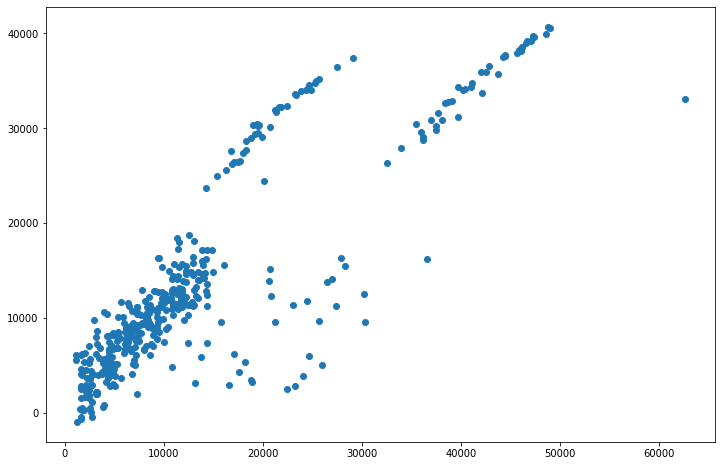

In [ ]:
plt.scatter(y_test, y_pred)
plt.show() 

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

           Actual     Predicted
670    4837.58230   6756.402265
318    7421.19455   8490.453100
345    6184.29940   7550.972034
1335   1629.83350   4660.607006
535    6067.12675   6715.236193
...           ...           ...
1260   4544.23480   2816.291479
1282  14283.45940  23719.938507
185   43753.33705  35719.080146
503   32548.34050  26353.414436
110   10825.25370  12918.095176

[402 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4152.79
Mean squared error: 36409930.47
Root mean squared error: 6034.06
